In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Немного теории № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Немного теории № 2

Функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Градиент для функции потерь MSE в матричном виде:

$\frac{-2X^{T}(y-Xω)}{l}$

### Немного теории № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем случае отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Немного теории № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Немного теории № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

## Проверка кода

In [ ]:
!cp /content/drive/MyDrive/HSEHomework/3/descents.py .
!cp /content/drive/MyDrive/HSEHomework/3/linear_regression.py .

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)


    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Работа с данными

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Проведём следующее исследование данных:
    * Проанализируем тип столбцов, построим графики зависимости целевой переменной от признака, распределения значений признака;
    * Определим, какие признаки могут быть полезными на основе этих графиков, обработаем выбросы;
    * Определим, какие трансформации признаков будет уместно применить;
    * Разделим полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделим данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HSEHomework/3/autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [ ]:
data.isnull().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
data.shape

(241190, 10)

<Axes: >

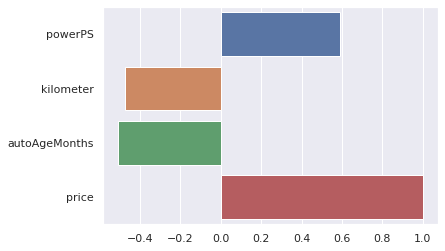

In [ ]:
corr = data.corrwith(data['price'])
sns.barplot(x=corr.values, y=corr.index)

In [ ]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


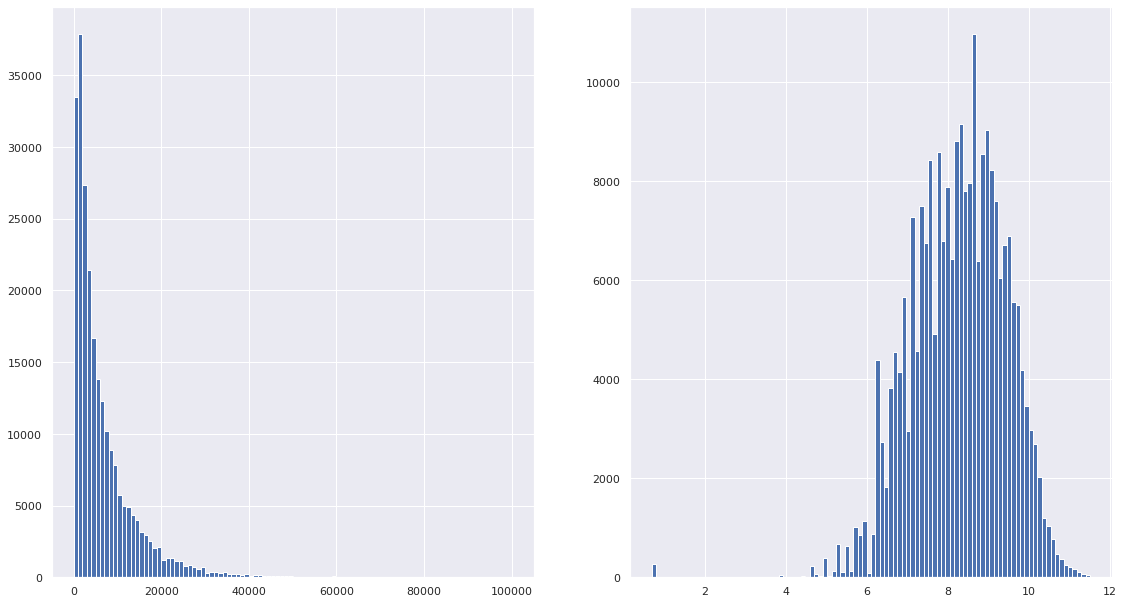

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(19, 10.5)
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=100)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(data['price']), bins=100)

plt.show()

<Axes: xlabel='brand', ylabel='price'>

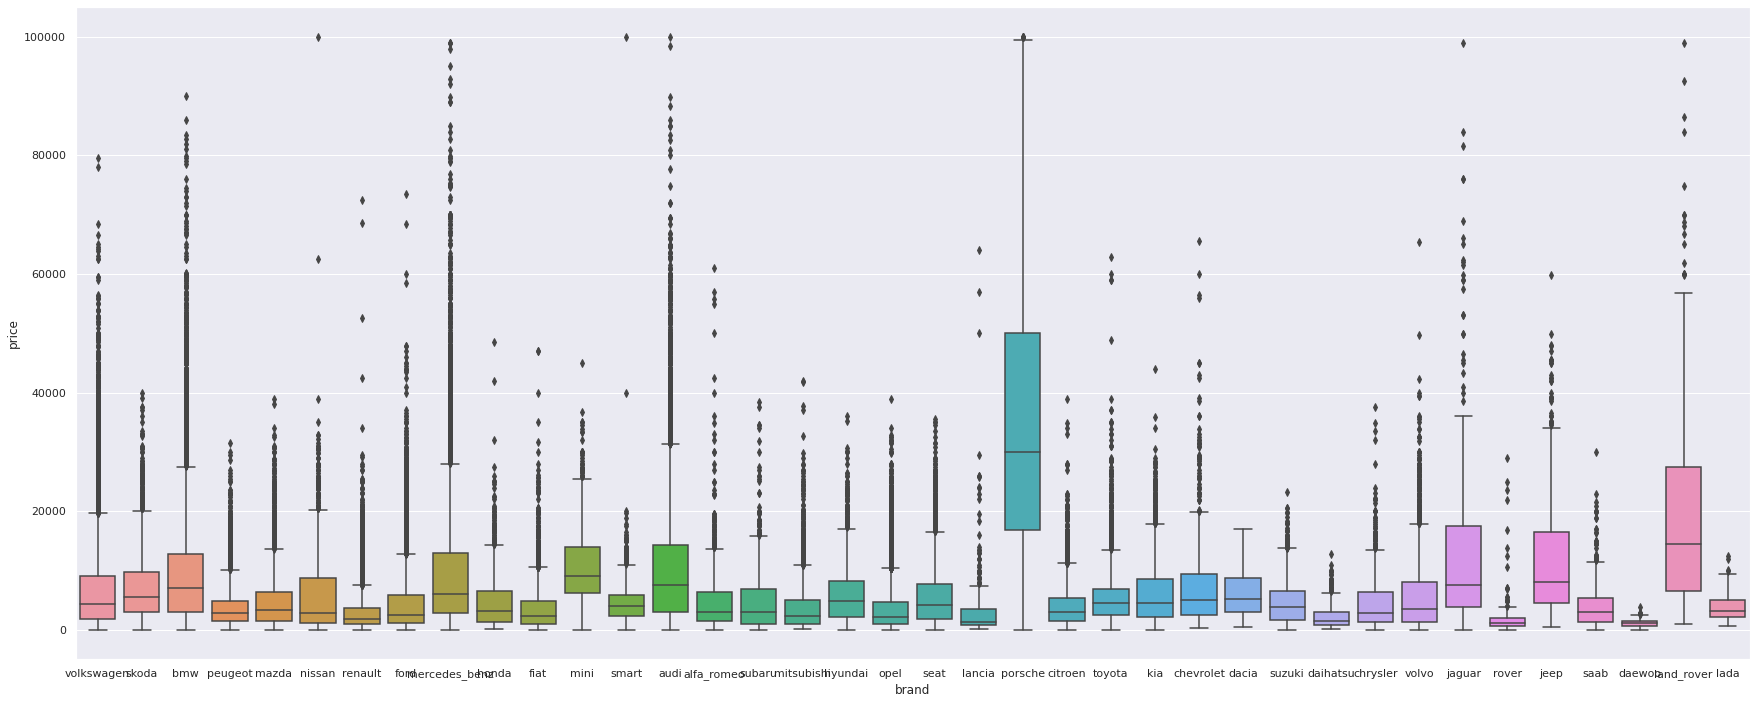

In [ ]:
sns.set(rc={"figure.figsize":(30, 12)})
sns.boxplot(data=data, x='brand', y='price')

<Axes: xlabel='vehicleType', ylabel='price'>

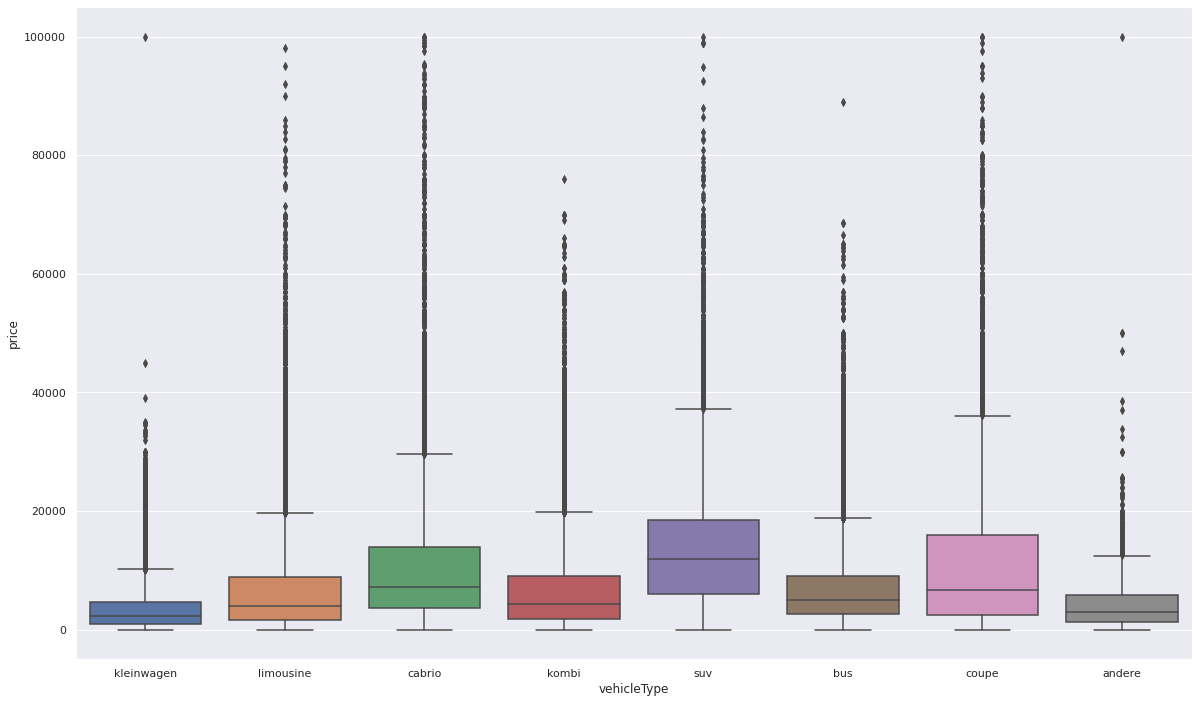

In [ ]:
sns.set(rc={"figure.figsize":(20, 12)})
sns.boxplot(data=data, x='vehicleType', y='price')

In [ ]:
data.model.nunique()

249

<Axes: xlabel='gearbox', ylabel='price'>

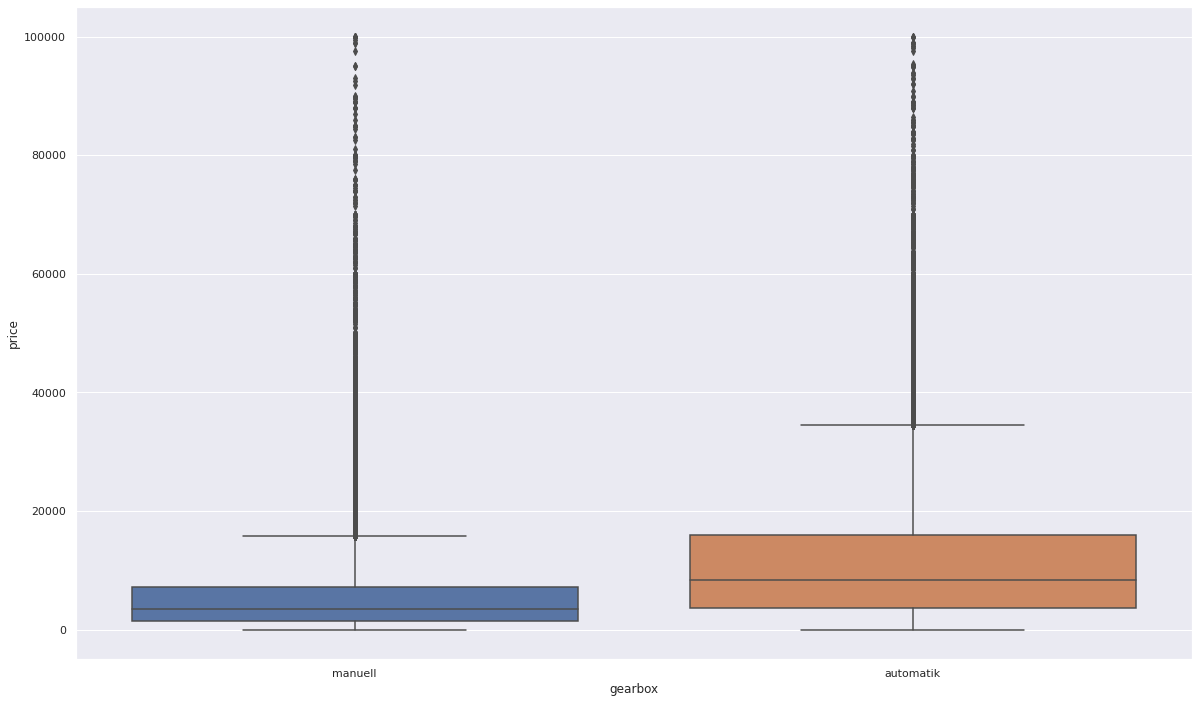

In [ ]:
sns.boxplot(data=data, x='gearbox', y='price')

<Axes: xlabel='fuelType', ylabel='price'>

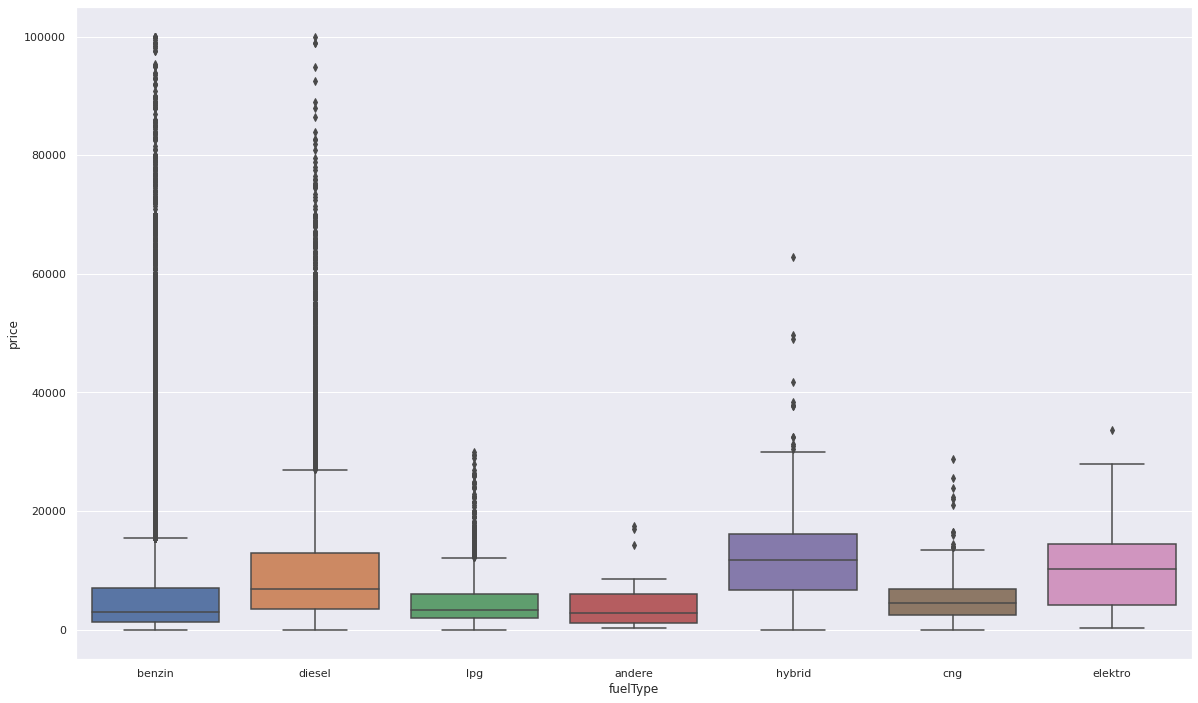

In [ ]:
sns.boxplot(data=data, x='fuelType', y='price')

<Axes: xlabel='notRepairedDamage', ylabel='price'>

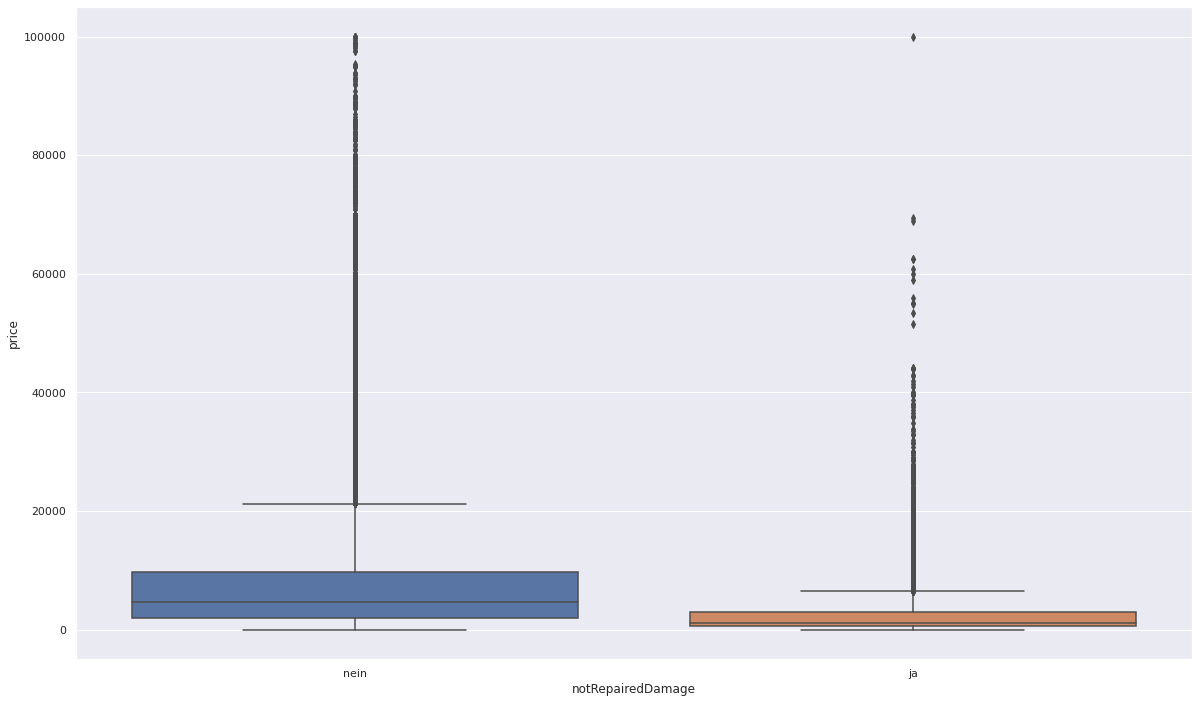

In [ ]:
sns.boxplot(data=data, x='notRepairedDamage', y='price')

In [ ]:
data['log_price'] = np.log1p(data['price'])

In [ ]:
data = data.drop('price', axis = 1)
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,7.601402
...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,8.974745
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,8.071219
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,7.090077
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9.127067


In [ ]:
data['is_premium'] = data['brand'].isin(['porsche', 'jaguar', 'bmw', 'mercedes_benz', 'mini', 'audi', 'land_rover', 'jeep'])

In [ ]:
data = data.drop('model', axis = 1)

<Axes: xlabel='is_premium', ylabel='log_price'>

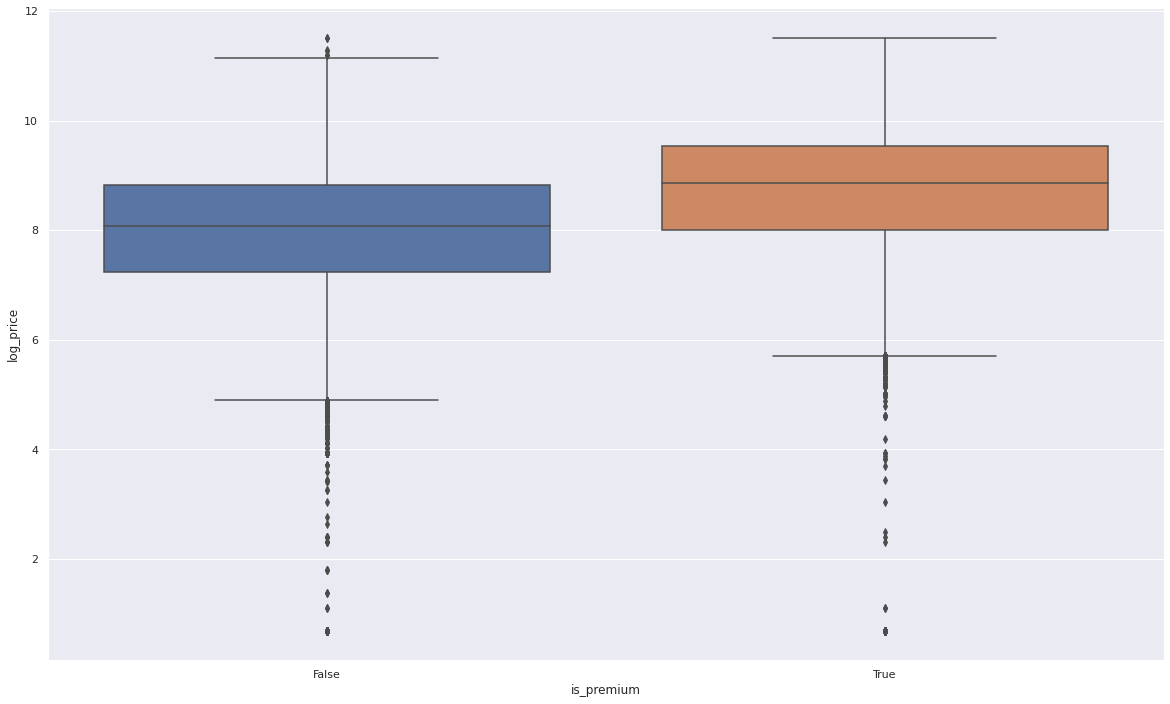

In [ ]:
sns.boxplot(data=data, x = 'is_premium', y = 'log_price')

In [ ]:
data.log_price.max()

11.512925464970229

In [ ]:
data.log_price.min()

0.6931471805599453

In [ ]:
data = data[(data['log_price'] < np.percentile(data['log_price'], 1)) == False]
data[(data['log_price'] > np.percentile(data['log_price'], 99.5)) == False]
data.shape

(239060, 10)

In [ ]:
#sns.regplot(x="powerPS", y="log_price", line_kws={'color': 'red'}, data=data)

In [ ]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']


Заметим, что логарифм цены имеет распредление, схожее с нормальным.

In [ ]:
data['bias'] = 1
other = ['is_premium', 'bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.111, random_state=10)

In [ ]:
y_train = y_train.values

In [ ]:
y_test = y_test.values
y_val = y_val.values

## Сравнение методов градиентного спуска

### Подбор оптимальной длины шага

Подберём по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделаем перебор по логарифмической сетке. Для каждого метода посчитаем ошибку на обучающей и тестовой выборках, посчитаем качество по метрике $R^2$, сохраним количество итераций до сходимости.

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()
X_val = X_val.toarray()

In [ ]:
data

,brand,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price,is_premium,bias
0,volkswagen,kleinwagen,manuell,benzin,nein,75,150000,177,7.313887,False,1
1,skoda,kleinwagen,manuell,diesel,nein,69,90000,93,8.188967,False,1
2,bmw,limousine,manuell,benzin,ja,102,150000,246,6.478510,True,1
3,peugeot,cabrio,manuell,benzin,nein,109,150000,140,7.696667,False,1
4,mazda,limousine,manuell,benzin,nein,105,150000,136,7.601402,False,1
...,...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,limousine,manuell,diesel,nein,140,150000,69,8.974745,False,1
241186,seat,limousine,manuell,benzin,ja,225,150000,142,8.071219,False,1
241187,smart,cabrio,automatik,benzin,nein,101,125000,192,7.090077,False,1
241188,volkswagen,bus,manuell,diesel,nein,102,150000,241,9.127067,False,1


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lambda_values = np.logspace(-3, 0.05, 20)
dimension = x.shape[1]
gradients = ['full', 'stochastic', 'momentum', 'adam']
result = pd.DataFrame()
descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension
    }
}
best_lambda = {}
for grad in gradients:
  descent_config['descent_name'] = grad
  lambda_list = []
  mse_comp=[]
  for lambd in lambda_values:
    descent_config['kwargs']['lambda_'] = lambd
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_val)
    mse_comp.append(mean_squared_error(y_val, y_pred))
    lambda_list.append(lambd)
  best_lambda[grad] = lambda_list[np.argmin(mse_comp)]

loss_history = {}
for grad in gradients:
  descent_config['descent_name'] = grad
  descent_config['kwargs']['lambda_'] = best_lambda[grad]
  regression = LinearRegression(descent_config=descent_config)
  regression.fit(X_train, y_train)
  y_test_pred = regression.predict(X_test)
  y_train_pred = regression.predict(X_train)
  mse_test = mean_squared_error(y_test_pred, y_test)
  mse_train = mean_squared_error(y_train_pred, y_train)
  r2_test = r2_score(y_test, y_test_pred)
  r2_train = r2_score(y_train, y_train_pred)
  max_iter = len(regression.loss_history)
  loss_history[grad] = regression.loss_history
  to_insert = {
      'Gradient' : [grad],
      'mse_train' : [mse_train],
      'mse_test' : [mse_test],
      'r2_train' : [r2_train],
      'r2_test' : [r2_test],
      'max_iter' : [max_iter],
      'lambda' : [best_lambda[grad]]
  }
  result = pd.concat([result, pd.DataFrame(to_insert)], ignore_index = True)
result

,Gradient,mse_train,mse_test,r2_train,r2_test,max_iter,lambda
0,full,0.314605,0.317051,0.735399,0.731979,39,1.122018
1,stochastic,0.323619,0.328227,0.727818,0.722532,171,0.535732
2,momentum,0.293219,0.295243,0.753386,0.750415,134,1.122018
3,adam,0.282489,0.285281,0.762411,0.758836,78,0.535732


### Сравнение методов

Построим график зависимости ошибки на обучающей выборке от номера итерации.

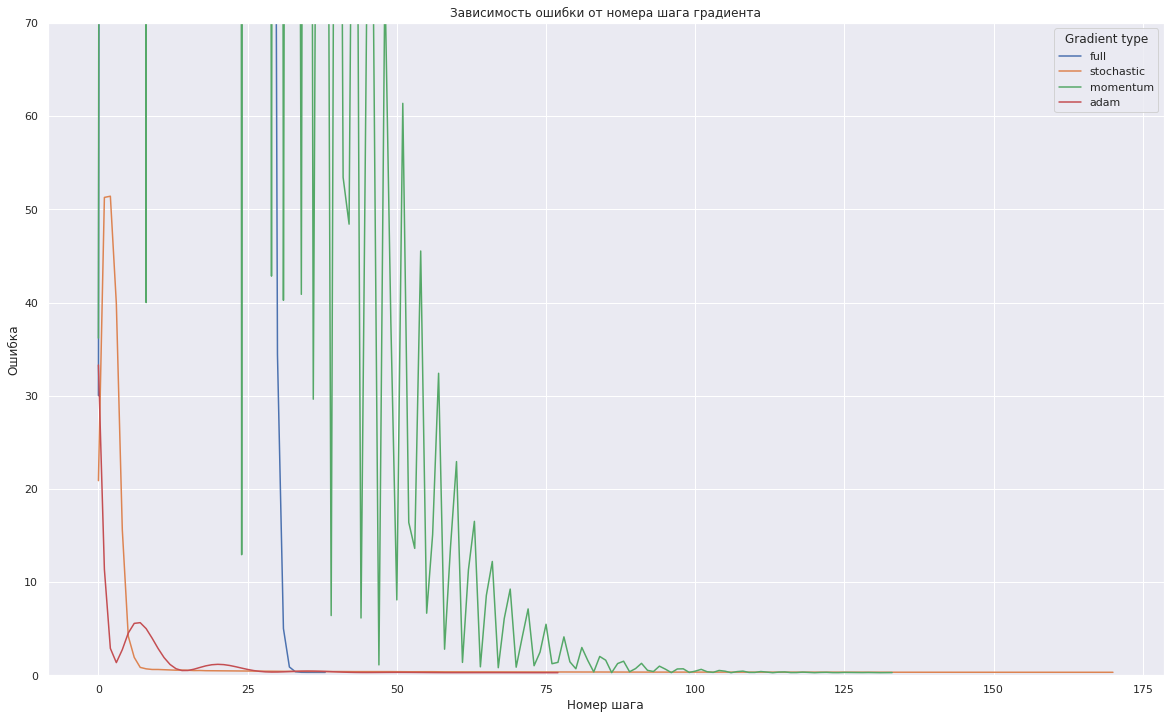

In [ ]:
for grad in gradients:
  plt.plot(np.arange(0, len(loss_history[grad])), loss_history[grad], label = grad)
plt.title('Зависимость ошибки от номера шага градиента')
plt.xlabel('Номер шага')
plt.ylabel('Ошибка')
plt.legend(title = 'Gradient type')

plt.ylim(0, 70)

plt.show()

Из графиков и данных выше явно заметны отличия различных типов градиентного спуска. <br>
**1) Полный** <br>
Довольно быстро достигает минимума: он имеет наименьшее количество итераций в данных и график, который резко убывает. <br>
**2) Стохастический** <br>
Требует наибольшего количества итераций для нахождения минимума, тем не менее график довольно быстро убывает <br>
**3) Метод инерции** <br>
Имеет меньшее количество шагов по сравнению со стохастическим, но график убывает не монотонно: он имеет пилообразный вид. <br>
**4) Adam** <br>
Наиболее эффективный по количеству шагов после полного, график также убывает довольно быстро, но не монотонно: после резкого убывания наблюдаются интервалы небольшого возрастания. <br>

## Стохастический градиентный спуск и размер батча

Исследуем влияние размера батча на работу стохастического градиентного спуска.

* Сделаем по несколько запусков стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерим время в секундах и количество итераций до сходимости. Посчитаем среднее этих значений для каждого размера батча.
* Построим график зависимости количества шагов до сходимости от размера батча.
* Построим график зависимости времени до сходимости от размера батча.

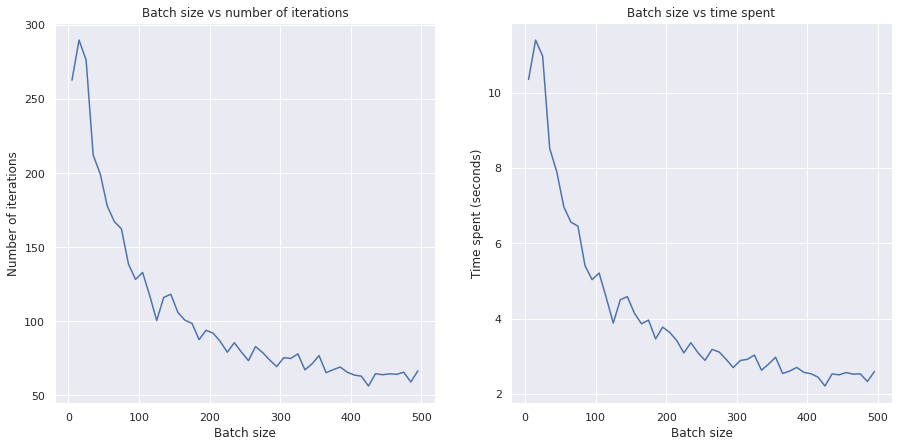

In [ ]:
import time

batch_sizes = np.arange(5, 500, 10)

iteration_num = []
time_spent = []


for size in batch_sizes:
  cur_iteration_num = []
  cur_time = []
  for k in range(10):
    start = time.process_time()
    descent_config['descent_name'] = 'stochastic'
    descent_config['kwargs']['batch_size'] = size
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    cur_time.append(time.process_time() - start)
    cur_iteration_num.append(len(regression.loss_history))
  iteration_num.append(np.array(cur_iteration_num).mean())
  time_spent.append(np.array(cur_time).mean())

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, iteration_num)
plt.title('Batch size vs number of iterations')
plt.xlabel('Batch size')
plt.ylabel('Number of iterations')
plt.subplot(1, 2, 2)
plt.title('Batch size vs time spent')
plt.xlabel('Batch size')
plt.ylabel('Time spent (seconds)')
plt.plot(batch_sizes, time_spent)


Если рассмотреть зависимость количества итераций и времени от размера батча, то в обоих случаях мы наблюдаем тренд на снижения на значениях размера от 5 до 500. Это происходит в силу того, что больший размер батча позволяет более точно определить направление антиградиента функции. Однако, следует заметить, что при дальнейшем увеличении размера батча экономия времени за счёт уменьшения количества шагов может быть нивелирована увеличением времени на расчёт градиента.
